In [2]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker
from pathlib import Path

In [3]:
# Load data and set seaborn style

df = pd.read_csv(Path('../data/Melbourne_clean.csv'))
df['date'] = pd.to_datetime(df['date'])
sns.set_style('whitegrid')

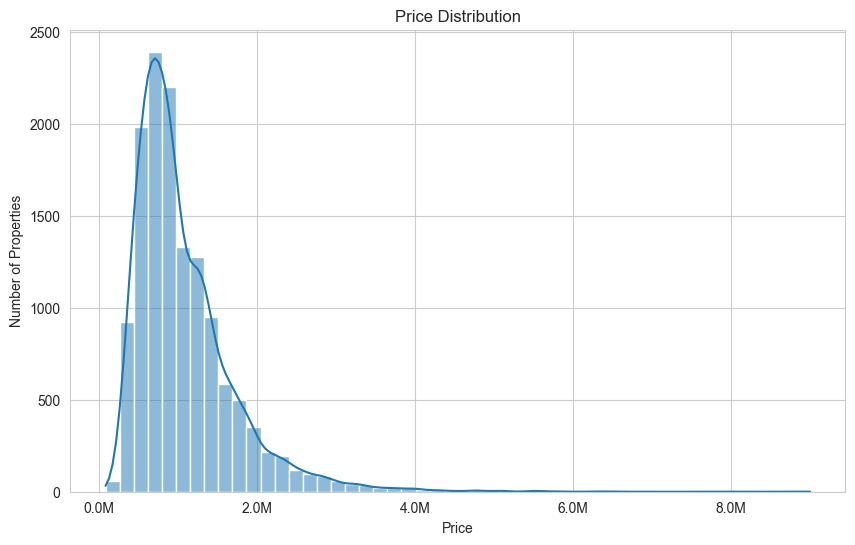

In [4]:
#-----------------------------------
# Price Distribution
#-----------------------------------

plt.figure(figsize=(10,6))
ax = sns.histplot(df['price'], bins= 50, kde=True)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _ : f'{x/1e6:.1f}M'))
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Properties')
plt.savefig('../visuals/price_distribution.png')
plt.show()

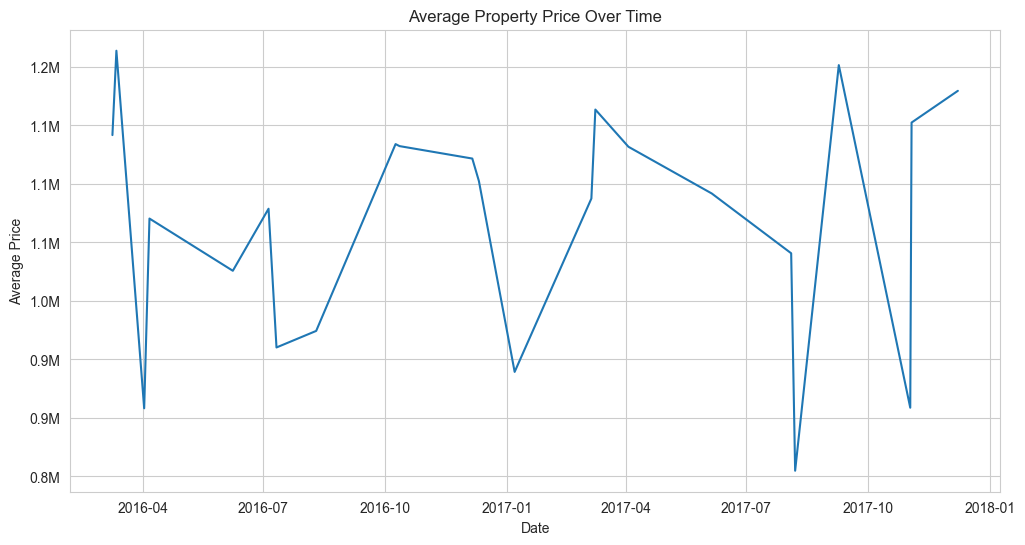

In [5]:
#-----------------------------------
# Price Over Time
#-----------------------------------

df_by_date = df.groupby('date')['price'].mean().reset_index()

plt.figure(figsize=(12,6))
ax = sns.lineplot(data= df_by_date, x='date', y='price')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _ : f'{x/1e6:.1f}M'))
plt.title('Average Property Price Over Time')
plt.ylabel('Average Price')
plt.xlabel('Date')
plt.savefig('../visuals/price_over_time.png')
plt.show()

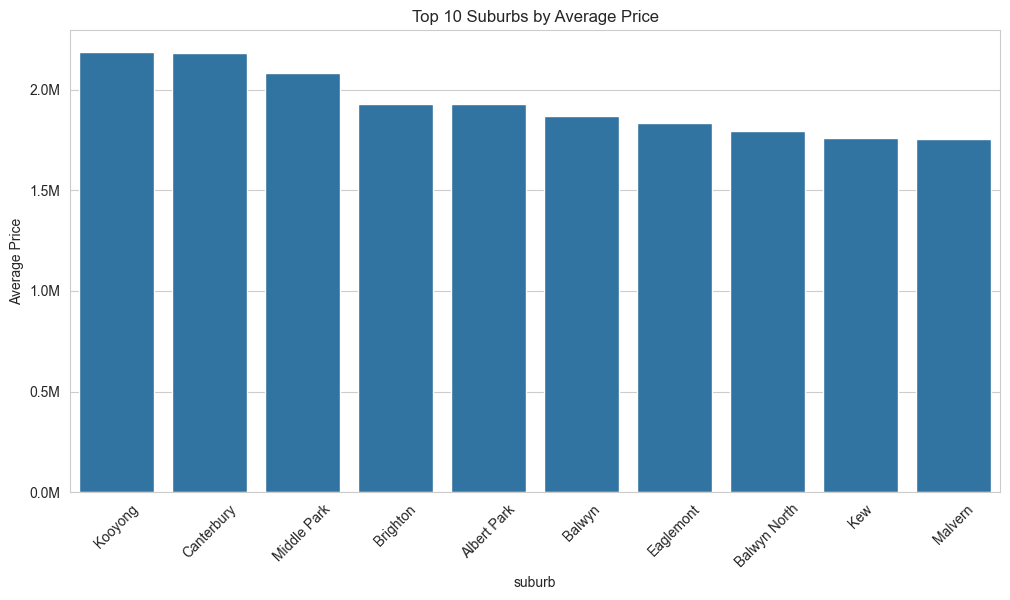

In [6]:
#-----------------------------------
# Price by Suburb
#-----------------------------------

top_suburbs = df.groupby('suburb')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_suburbs.index, y=top_suburbs.values)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _ : f'{x/1e6:.1f}M'))
plt.xticks(rotation=45)
plt.title('Top 10 Suburbs by Average Price')
plt.ylabel('Average Price')
plt.savefig('../visuals/top_suburbs_by_price')
plt.show()

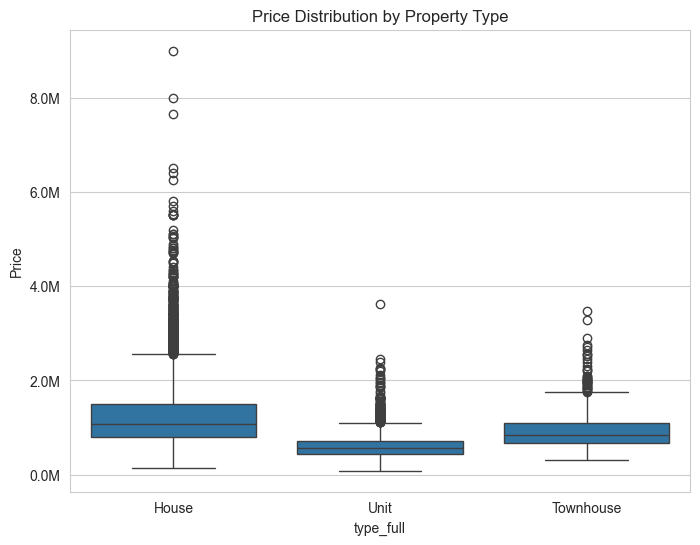

In [9]:
#-----------------------------------
# Price by Property Type
#-----------------------------------

type_labels = {
    'h' : 'House',
    'u' : 'Unit',
    't' : 'Townhouse'
}

df_plot = df.copy()
df_plot['type_full'] = df_plot['type'].map(type_labels)

plt.figure(figsize=(8,6))
ax = sns.boxplot(data=df_plot, x='type_full', y='price')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _ : f'{x/1e6:.1f}M'))
plt.title('Price Distribution by Property Type')
plt.ylabel('Price')
plt.savefig('../visuals/price_by_type.png')
plt.show()

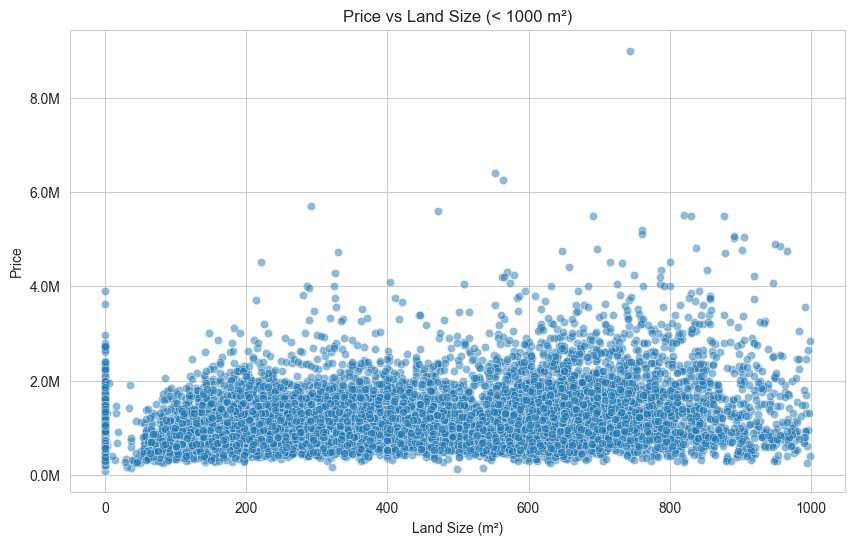

In [10]:
#-----------------------------------
# Price vs Land Size
#-----------------------------------

plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=df[df['landsize'] < 1000], x='landsize', y='price', alpha = 0.5)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _ : f'{x/1e6:.1f}M'))
plt.title('Price vs Land Size (< 1000 m²)')
plt.xlabel('Land Size (m²)')
plt.ylabel('Price')
plt.savefig('../visuals/price_vs_land_size.png')
plt.show()

In [14]:
fig = px.scatter_mapbox(
    df,
    lat='lattitude',
    lon='longtitude',
    color='price',
    size='price',
    size_max=15,
    color_continuous_scale='Viridis',
    mapbox_style='carto-positron',
    hover_name='suburb',
    hover_data={'price': ':,.0f', 'rooms': True, 'type': True},
    zoom=10,
    height=600,
    title='Property Prices Across Melbourne'
)

fig.write_html('../visuals/price_map.html')
fig.show()

C:\Users\jeanp\AppData\Local\Temp\ipykernel_5932\665487424.py:1: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


In [17]:
suburb_summary = df.groupby('suburb').agg({
    'lattitude' : 'mean',
    'longtitude' : 'mean',
    'price': 'mean'
}).reset_index()

fig = px.scatter_mapbox(
    suburb_summary,
    lat='lattitude',
    lon='longtitude',
    color='price',
    size='price',
    size_max=20,
    color_continuous_scale='Viridis',
    mapbox_style='carto-positron',
    hover_name='suburb',
    hover_data={'price': ':,.0f'},
    zoom=10,
    height=600,
    title='Average Prices Across by Suburb'
)

fig.write_html('../visuals/price_map_by_suburb.html')
fig.show()

C:\Users\jeanp\AppData\Local\Temp\ipykernel_5932\3639410448.py:7: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

